// using saved confusion matrices

In [ ]:
import torch

## Evaluation

In [ ]:
def calc_confusion_matrix(preds, labels):
    """ rows = true labels, cols = predicted labels """
    cm = torch.zeros((3, 3), dtype=torch.int64)
    for t, p in zip(labels, preds):
        cm[t, p] += 1
    return cm

In [ ]:
def calc_accuracy(cm, perclass=False):
    if perclass:
        """Accuracy     = TruePositive / suma wszystkich elementów"""
        tp = cm.diag()
        total = cm.sum(dim=1)  
        return tp.float() / (total.float() + 1e-8)
    else:
        """Accuracy     = suma przekątnej / suma wszystkich elementów"""
        return cm.diag().sum().item() / cm.sum().item()

In [ ]:
def calc_precision(cm, perclass=False):
    """Precision per class      = TruePositive / (TruePositive + FalsePositive)"""
    tp = cm.diag().float()
    fp = cm.sum(dim=0).float() - tp
    per_class_precision = tp / (tp + fp + 1e-8)
    
    if perclass:
        return per_class_precision
    else:
        return per_class_precision.mean().item()

In [ ]:
def calc_recall(cm, perclass=False):
    """Recall per class         = TruePositive / (TruePositive + FalseNegative)"""
    tp = cm.diag().float()
    fn = cm.sum(dim=1).float() - tp
    per_class_recall = tp / (tp + fn + 1e-8)
    
    if perclass:
        return per_class_recall
    else:
        return per_class_recall.mean().item()

## Evaluation (old)

In [ ]:
def compute_confusion_matrix(preds, labels):
    """ rows = true labels, cols = predicted labels """
    cm = torch.zeros((3, 3), dtype=torch.int64)
    for t, p in zip(labels, preds):
        cm[t, p] += 1
    return cm

def accuracy(cm):
    """Accuracy     = suma przekątnej / suma wszystkich elementów"""
    return cm.diag().sum().item() / cm.sum().item()

def precision(cm):
    """Precision per class      = TruePositive / (TruePositive + FalsePositive)"""
    tp = cm.diag()
    fp = cm.sum(dim=0) - tp
    precision_per_class = tp / (tp + fp + 1e-8)
    return precision_per_class.mean().item()

def recall(cm):
    """Recall per class         = TruePositive / (TruePositive + FalseNegative)"""
    tp = cm.diag()
    fn = cm.sum(dim=1) - tp
    recall_per_class = tp / (tp + fn + 1e-8)
    return recall_per_class.mean().item()

In [ ]:
def calc_metrics(model, testLoader):
    model.eval()
    
    all_preds, all_labels = [], []

    with torch.no_grad():
        for X, y in testLoader:
            X, y = X.to(device), y.to(device)
            
            pred = model(X)
            preds = torch.argmax(pred, dim=1)
            
            all_preds.append(preds)
            all_labels.append(y)

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    cm = compute_confusion_matrix(all_preds, all_labels)
    acc = accuracy(cm)
    prec = precision(cm)
    rec = recall(cm)

    return acc, prec, rec, cm, all_preds

In [ ]:
metrics = calc_metrics(model, test_loader)
print(metrics[0:3])

(0.5644171779141104, 0.6775162816047668, 0.5717581510543823)


C:\Users\1310i\AppData\Local\Temp\ipykernel_18712\256409286.py:10: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (1).

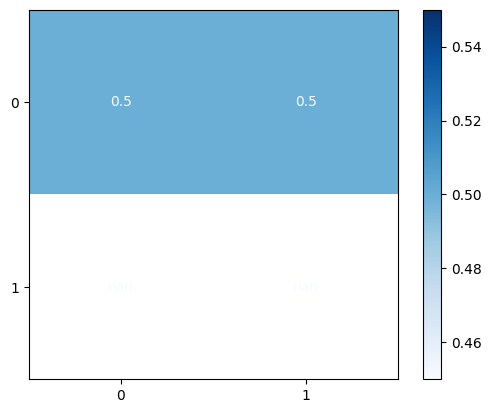

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Suppose all_labels and all_preds are defined
all_labels_indices = np.array([np.argmax(label) for label in all_labels])
cm = confusion_matrix(all_labels_indices, all_preds)

# Normalize per true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized,
                              display_labels=np.unique(all_labels_indices))
ax = plt.gca()
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Stabilize color scale
ax.images[0].set_clim(0, 1)  # force color range 0-1

plt.title("Normalized Confusion Matrix (per-class accuracy)")
plt.show()
